# Simple Linear Regression

Drug impact on Carona Viral Count.

## Step 1: Reading and Understanding the Data


1. Import libraries: 
2. Read data using the pandas library
2. Understand the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

drugData = pd.read_csv("D:/Harie/Data Science/NareshIT/Files/ML/SLR-Viral Drug data.csv")
drugData.head()

,Viralcount (Y),Drug (X)
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50


#### Study the strcture of the data

In [4]:
drugData.shape

(20, 2)

In [5]:
drugData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Viralcount (Y)  20 non-null     float64
 1   Drug (X)        20 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


In [6]:
drugData.describe()

,Viralcount (Y),Drug (X)
count,20.000000,20.000000
mean,2131.357500,13.362500
std,298.570066,7.631511
min,1678.150000,2.000000
25%,1783.475000,7.125000
50%,2182.850000,12.750000
75%,2342.037500,19.625000
max,2654.200000,25.000000


## Step 2: Visualising the Data

1. Plot Pairplot for correlation among X and Y variables (for MLR only)
2. Understand the relationship

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

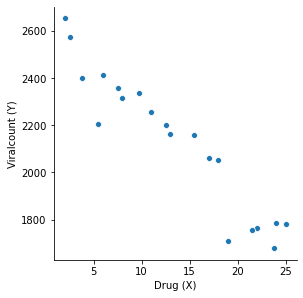

In [8]:
sns.pairplot(drugData, x_vars=['Drug (X)'], y_vars='Viralcount (Y)',size=4, aspect=1, kind='scatter')
plt.show()

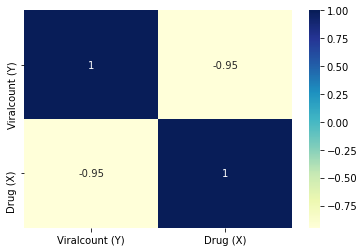

In [9]:
sns.heatmap(drugData.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### As it is visible from the pairplot and the heatmap that the variable `Drug` seems to be most correlated with `Viralcount`. So let's go ahead and perform simple linear regression using `Drug` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of multiple linear regression<br>
$y = β̥ + β̩ *x_1 + β₂* x_2 + ... + βn * x_n$

-  $y$ is the response variable
-  $β̥ $ is the intercept
-  $β̩ $ is the coefficient for the first feature
-  $β̩n$ is the coefficient for the nth feature<br>

In SLR:

$y = β̥  + β̩  \times Drug$

The $β̩$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Drug`, in this case, to the variable `X` and the response variable, `Viralcount`, to the variable `y`.

In [10]:
X = drugData['Drug (X)']
y = drugData['Viralcount (Y)']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()
X_train.shape

(14,)

In [13]:
y_train.head()
y_train.shape

(14,)

#### Building a Linear Model

First import the `statsmodel.api` library using which you'll perform the linear regression

In [14]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin.<Br> But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. <br> And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

X_train_sm

,const,Drug (X)
16,1.0,6.00
1,1.0,23.75
9,1.0,11.00
14,1.0,22.00
12,1.0,25.00
5,1.0,19.00
2,1.0,8.00
4,1.0,5.50
10,1.0,13.00
0,1.0,15.50


In [16]:
# Fit the resgression line using 'OLS'
linearReg = sm.OLS(y_train, X_train_sm).fit()

In [17]:
linearReg

In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
linearReg.params

const       2606.714499
Drug (X)     -36.109693
dtype: float64

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(linearReg.summary())

                            OLS Regression Results                            
Dep. Variable:         Viralcount (Y)   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     81.41
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.07e-06
Time:                        20:16:44   Log-Likelihood:                -83.945
No. Observations:                  14   AIC:                             171.9
Df Residuals:                      12   BIC:                             173.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2606.7145     62.091     41.982      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Drug is -36.1097, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.872
Meaning that 87.2% of the variance in `Viralcount` is explained by `Drug`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Viralcount = 2606.7145 - 36.1097 \times Drug $

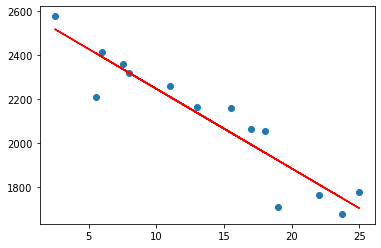

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2606.7145 - 36.1097*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
- To validate assumptions of the model
- Reliability for inference

#### Assumption 1.Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [24]:
y_train_pred = linearReg.predict(X_train_sm)
residuals = (y_train - y_train_pred)
residuals

16     24.343658
1     -70.959294
9      47.192122
14    -47.001257
12     75.827822
5    -212.330335
2      -1.836956
4    -200.611188
10     27.911508
0     111.685740
15     96.759972
7      58.559733
3      68.450279
8      22.008197
dtype: float64

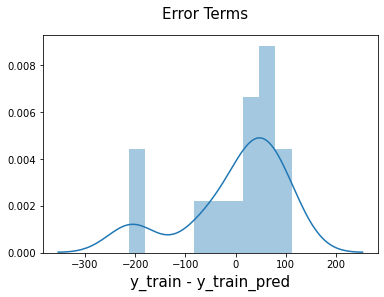

In [25]:
fig = plt.figure()
sns.distplot(residuals, bins = 10)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

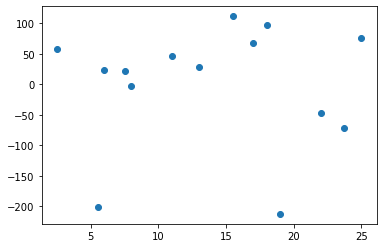

In [37]:
plt.scatter(X_train,residuals)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [21]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm


,const,Drug (X)
17,1.0,12.50
19,1.0,21.50
11,1.0,3.75
18,1.0,2.00
13,1.0,9.75
6,1.0,24.00


In [23]:
# Predict the y values corresponding to X_test_sm
y_pred = linearReg.predict(X_test_sm)

In [24]:
y_pred.head()

17    2155.343339
19    1830.356103
11    2471.303151
18    2534.495113
13    2254.644994
dtype: float64

In [25]:
# import libraries to measure r^2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [26]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

77.59410016042446

###### Checking the R-squared on the test set

In [27]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9431679223116978

##### Visualizing the fit on the test set

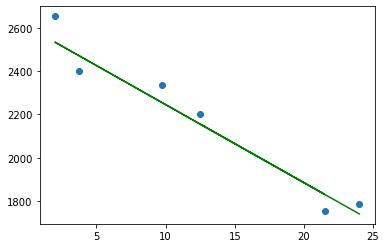

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 2606.7145 - 36.1097*X_test, 'g')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [28]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
X_train_lr.shape

(14,)

In [30]:
X_train_lr

16     6.00
1     23.75
9     11.00
14    22.00
12    25.00
5     19.00
2      8.00
4      5.50
10    13.00
0     15.50
15    18.00
7      2.50
3     17.00
8      7.50
Name: Drug (X), dtype: float64

In [31]:
type(X_train_lr)

pandas.core.series.Series

In [32]:
X_train_lr.shape

(14,)

In [33]:
X_train_lr = X_train_lr.values.reshape(-1,1)
X_test_lr = X_test_lr.values.reshape(-1,1)

In [34]:
print(X_train_lr.shape)
print(y_train_lr.shape)
print(X_test_lr.shape)
print(y_test_lr.shape)

(14, 1)
(14,)
(6, 1)
(6,)


In [35]:
X_train_lr

array([[ 6.  ],
       [23.75],
       [11.  ],
       [22.  ],
       [25.  ],
       [19.  ],
       [ 8.  ],
       [ 5.5 ],
       [13.  ],
       [15.5 ],
       [18.  ],
       [ 2.5 ],
       [17.  ],
       [ 7.5 ]])

In [36]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
liReg = LinearRegression()

# Fit the model using lr.fit()
liReg.fit(X_train_lr, y_train_lr)

LinearRegression()

In [37]:
print(liReg.intercept_)
print(liReg.coef_)

2606.7144987003226
[-36.10969281]


The equationwe get is the same as what we got before!

$ Viralcount = 2606.7145 - 36.1097 * Drug $

## Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)